<a href="https://colab.research.google.com/github/Marcelo-Ferraz-de-Oliveira/ACS/blob/master/ALURA_NPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

resenha = pd.read_csv("/content/imdb-reviews-pt-br.csv")
resenha.head()

id  ... sentiment
0   1  ...       neg
1   2  ...       neg
2   3  ...       neg
3   4  ...       neg
4   5  ...       neg

[5 rows x 4 columns]

In [0]:
resenha

id  ... sentiment
0          1  ...       neg
1          2  ...       neg
2          3  ...       neg
3          4  ...       neg
4          5  ...       neg
...      ...  ...       ...
49454  49456  ...       pos
49455  49457  ...       pos
49456  49458  ...       pos
49457  49459  ...       pos
49458  49460  ...       pos

[49459 rows x 4 columns]

In [0]:
from sklearn.model_selection import train_test_split
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [0]:
from sklearn.linear_model import LogisticRegression

#regressao = LogisticRegression()
#regressao.fit(treino, classe_treino)

In [0]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [0]:
print("Positiva \n")
print(resenha.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [0]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [0]:
resenha.head()

id  ... sentiment
0   1  ...       neg
1   2  ...       neg
2   3  ...       neg
3   4  ...       neg
4   5  ...       neg

[5 rows x 4 columns]

In [0]:
classificacao = resenha["sentiment"].replace(["neg","pos"], [0,1])

In [0]:
resenha["classificacao"] = classificacao

In [0]:
resenha.tail()

id  ... classificacao
49454  49456  ...             1
49455  49457  ...             1
49456  49458  ...             1
49457  49459  ...             1
49458  49460  ...             1

[5 rows x 5 columns]

In [0]:
#dataframe2 = pd.SparseDataFrame(resenha)
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme ótimo','Assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [0]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [0]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [0]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [0]:
matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [0]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [0]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):

  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)

  regressao_logistica = LogisticRegression(solver='lbfgs')
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)


In [0]:
print(classificar_texto(resenha,"text_pt","classificacao"))

0.6583097452486858


In [0]:
%matplotlib inline

from wordcloud import WordCloud




In [0]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])


In [0]:
nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110, collocations= False).generate(todas_palavras)

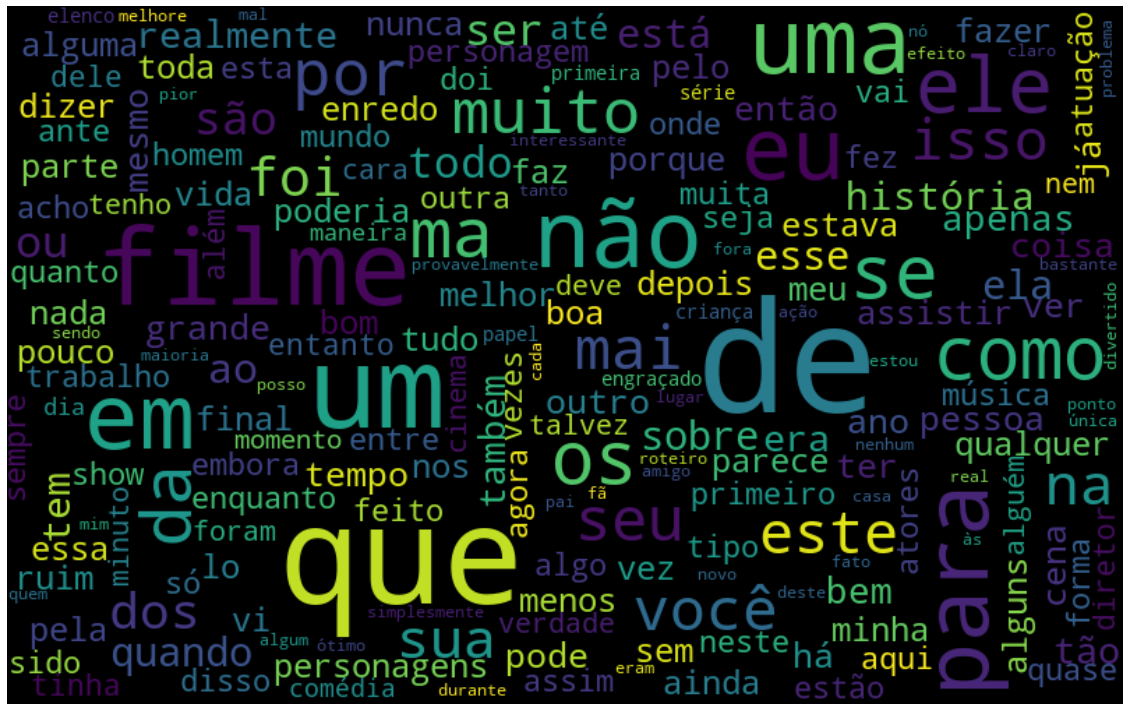

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
plt.imshow(nuvem_palavras,interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
resenha.query("sentiment == 'pos'")

id  ... classificacao
12389  12391  ...             1
12390  12392  ...             1
12391  12393  ...             1
12392  12394  ...             1
12393  12395  ...             1
...      ...  ...           ...
49454  49456  ...             1
49455  49457  ...             1
49456  49458  ...             1
49457  49459  ...             1
49458  49460  ...             1

[24694 rows x 5 columns]

In [0]:
def nuvem_palavras_func(texto,coluna_texto,pos=True):
  if pos:
    texto_filt = texto.query("sentiment == 'pos'")
  else:
    texto_filt = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_filt[coluna_texto]])

  nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110, collocations= False).generate(todas_palavras)

  plt.figure(figsize=(20,14))
  plt.imshow(nuvem_palavras,interpolation="bilinear")
  plt.axis("off")
  plt.show()

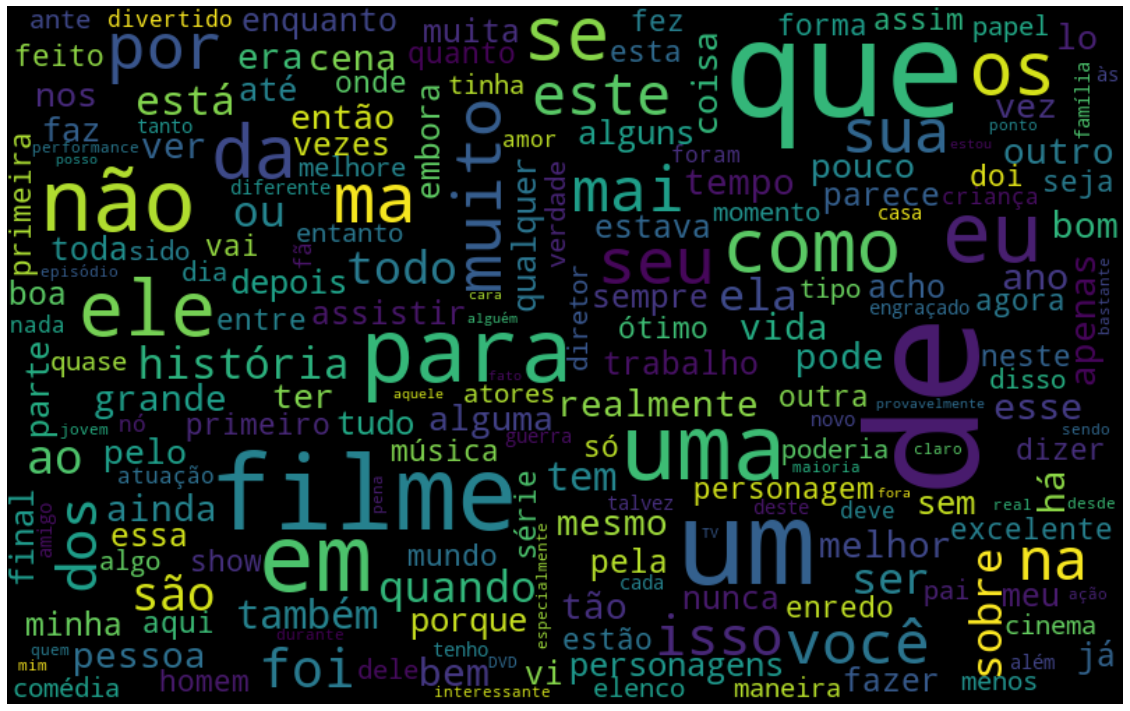

In [0]:
nuvem_palavras_func(resenha,"text_pt")

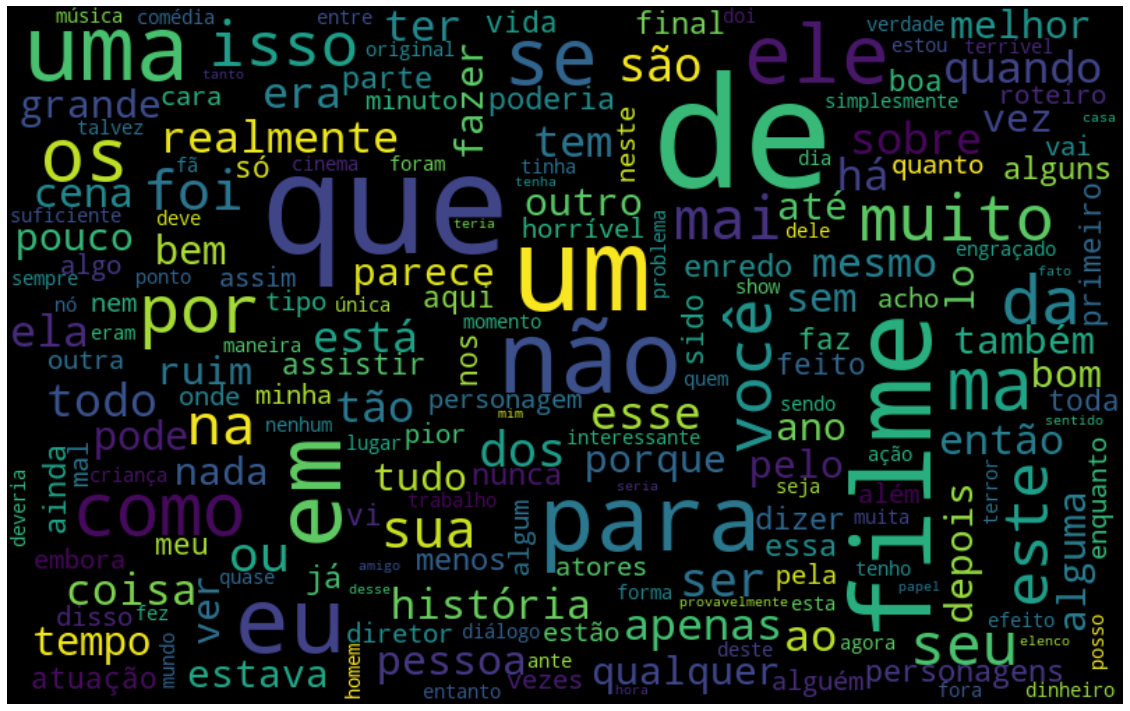

In [0]:
nuvem_palavras_func(resenha,"text_pt",pos=False)

In [0]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [0]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


In [0]:

token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [0]:
df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),
                              "Frequencia":list(frequencia.values())})

In [0]:
df_frequencia.nlargest(columns="Frequencia",n=10)

Palavra  Frequencia
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

In [0]:
import seaborn as sns
def pareto(texto, coluna_texto, quantidade=10):  
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),
                              "Frequencia":list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns="Frequencia",n=quantidade)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia", color='gray')
  ax.set(ylabel="Contagem")
  plt.show()

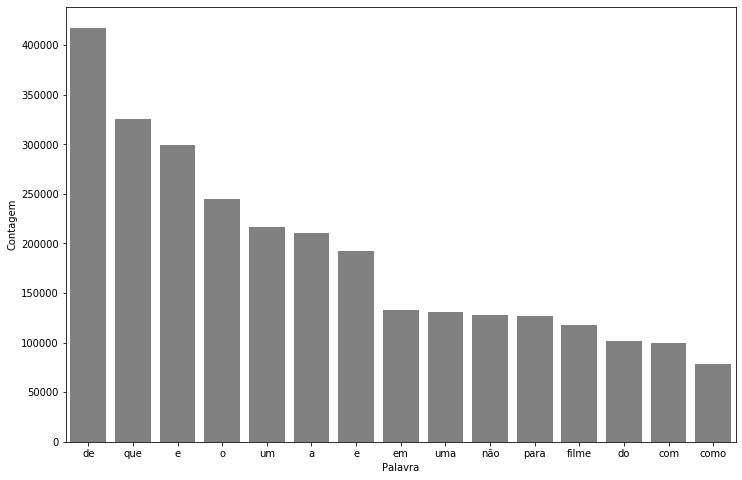

In [0]:
pareto(resenha,"text_pt",15)

In [0]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [0]:
frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(" ".join(nova_frase))

resenha["tratamento_1"] = frase_processada
 

In [0]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6607359482410028

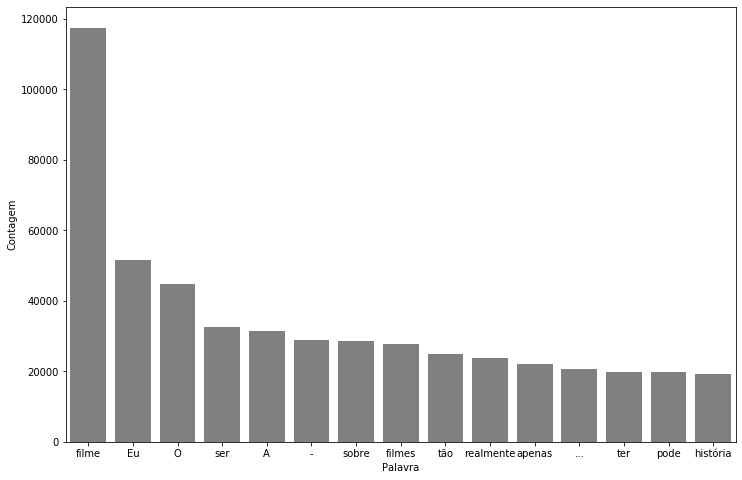

In [0]:
pareto(resenha,"tratamento_1",quantidade=15)

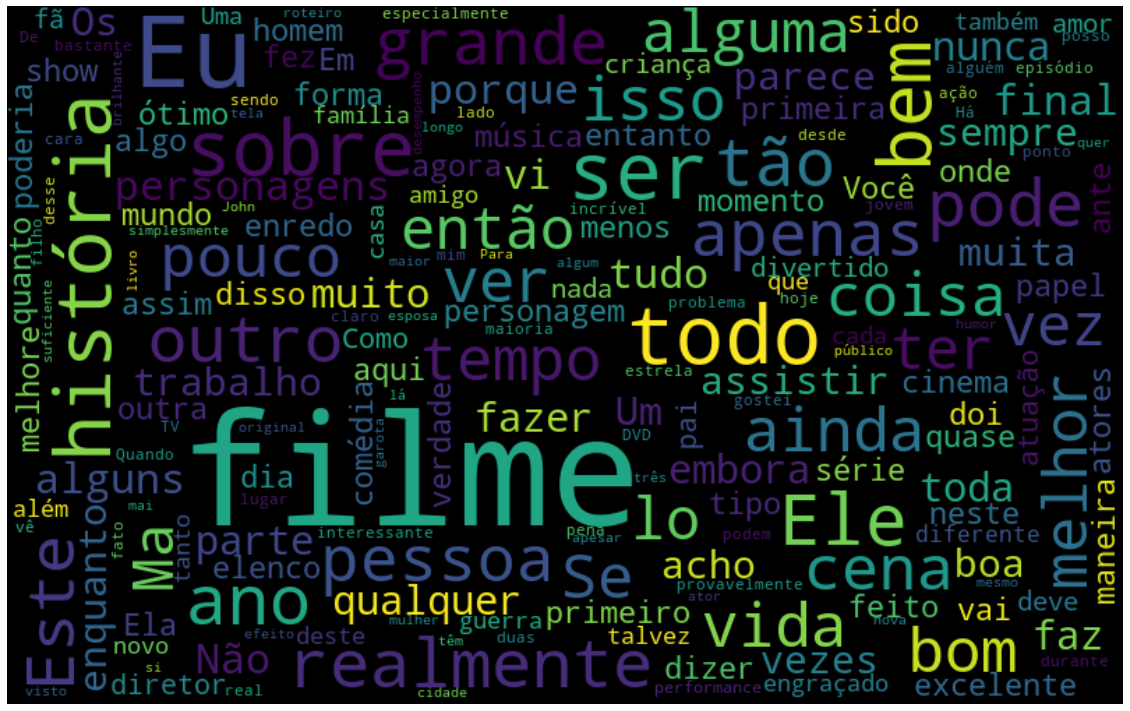

In [0]:
nuvem_palavras_func(resenha,"tratamento_1")

In [0]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Olá', 'mundo', '!']

In [0]:
from string import punctuation

pontuacao = [x for x in punctuation]

pontuacao_stop_words = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stop_words:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [0]:
resenha

id  ...                                       tratamento_2
0          1  ...  Mais vez Sr Costner arrumou filme tempo necess...
1          2  ...  Este exemplo motivo maioria filmes ação mesmos...
2          3  ...  Primeiro tudo odeio raps imbecis poderiam agir...
3          4  ...  Nem Beatles puderam escrever músicas todos gos...
4          5  ...  Filmes fotos latão palavra apropriada verdade ...
...      ...  ...                                                ...
49454  49456  ...  Como média votos baixa fato funcionário locado...
49455  49457  ...  O enredo algumas reviravoltas infelizes inacre...
49456  49458  ...  Estou espantado forma filme maioria outros méd...
49457  49459  ...  A Christmas Together realmente veio antes temp...
49458  49460  ...  O drama romântico classe trabalhadora diretor ...

[49459 rows x 7 columns]

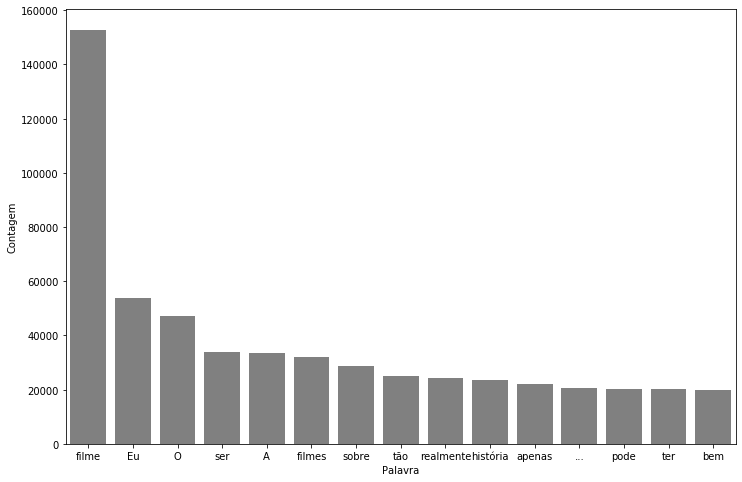

In [0]:
pareto(resenha,"tratamento_2", 15)

In [0]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.7MB/s 


In [0]:

import unidecode

acentos = "ótimos péssimo não é tão"
teste = unidecode.unidecode(acentos)
teste

'otimos pessimo nao e tao'

In [0]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [0]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [0]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stop_words]

In [0]:
resenha["tratamento_3"] = sem_acentos
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada


In [0]:
resenha.head()

id  ...                                       tratamento_4
0   1  ...  Mais vez Sr Costner arrumou filme tempo necess...
1   2  ...  Este exemplo motivo maioria filmes acao mesmos...
2   3  ...  Primeiro tudo odeio raps imbecis poderiam agir...
3   4  ...  Nem Beatles puderam escrever musicas todos gos...
4   5  ...  Filmes fotos latao palavra apropriada verdade ...

[5 rows x 9 columns]

In [0]:
acuracia_tratamento3 = classificar_texto(resenha,"tratamento_3","classificacao")

In [0]:
acuracia_tratamento3

0.6810351799433886

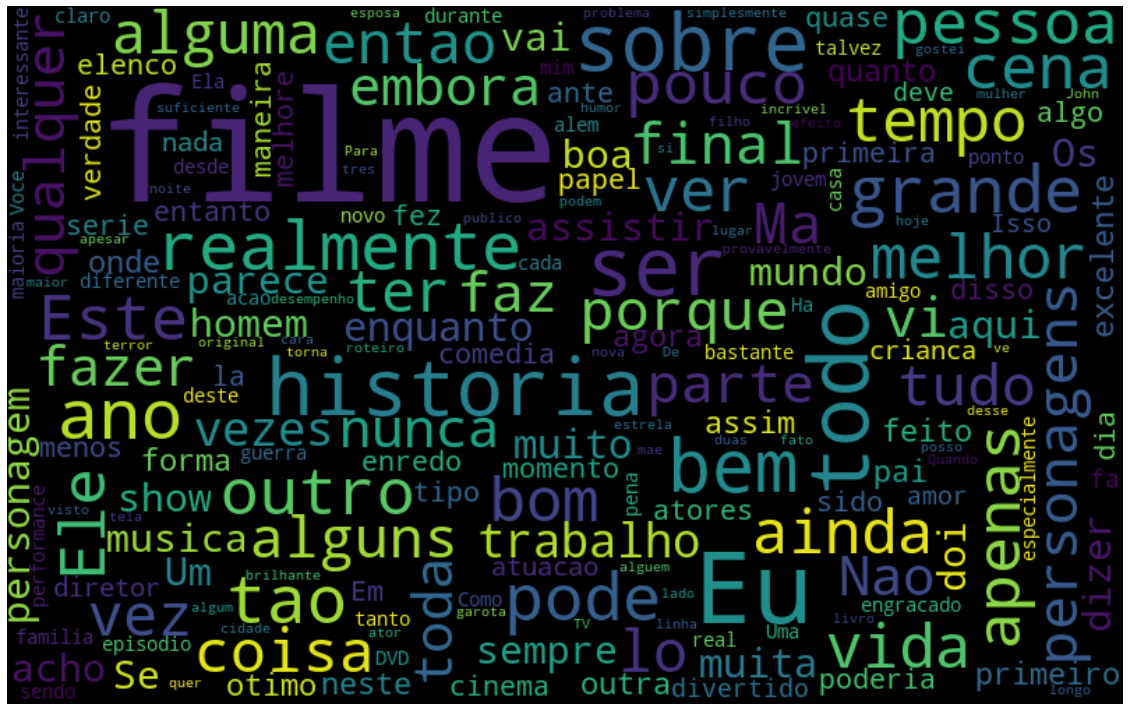

In [0]:
nuvem_palavras_func(resenha,"tratamento_3")

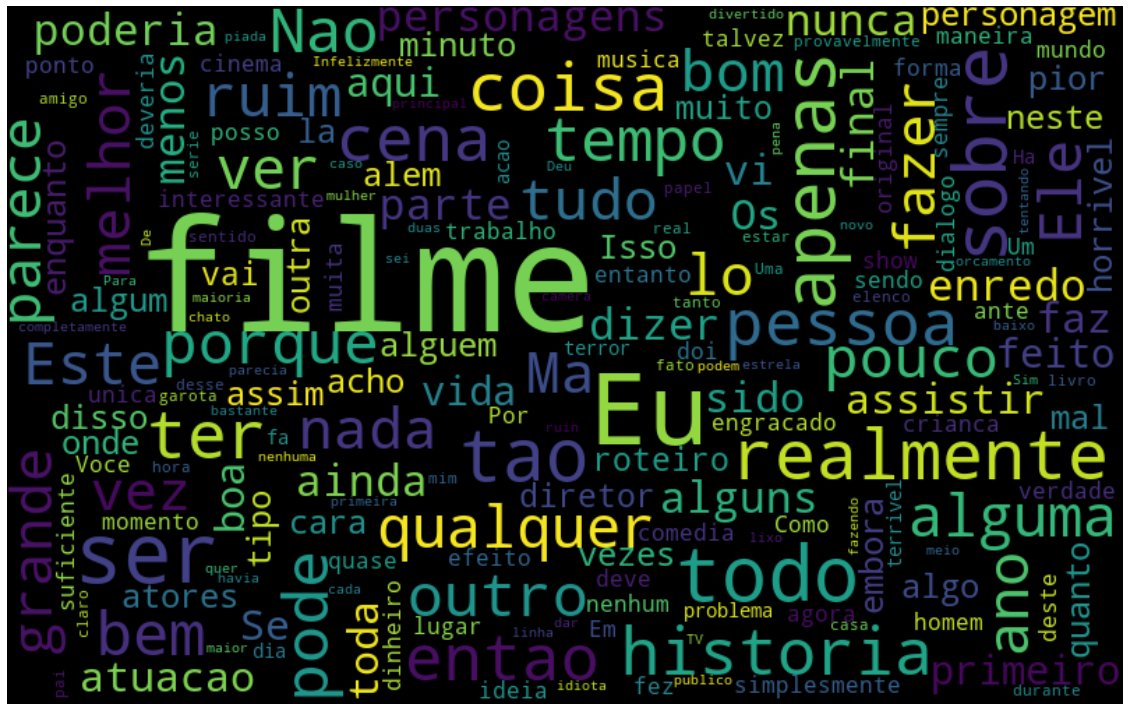

In [0]:
nuvem_palavras_func(resenha,"tratamento_3",False)

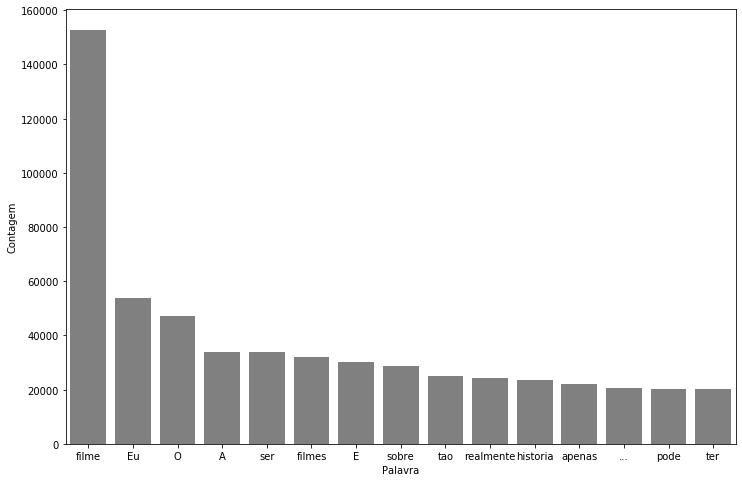

In [0]:
pareto(resenha,"tratamento_3", 15)

In [0]:

resenha["tratamento_4"] = [opiniao.lower() for opiniao in resenha["tratamento_3"]]

frase_processada = list()
for opiniao in resenha["tratamento_4"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [0]:
acuracia_tratamento4 = classificar_texto(resenha,"tratamento_4","classificacao")

In [0]:
acuracia_tratamento4

0.6879094217549535

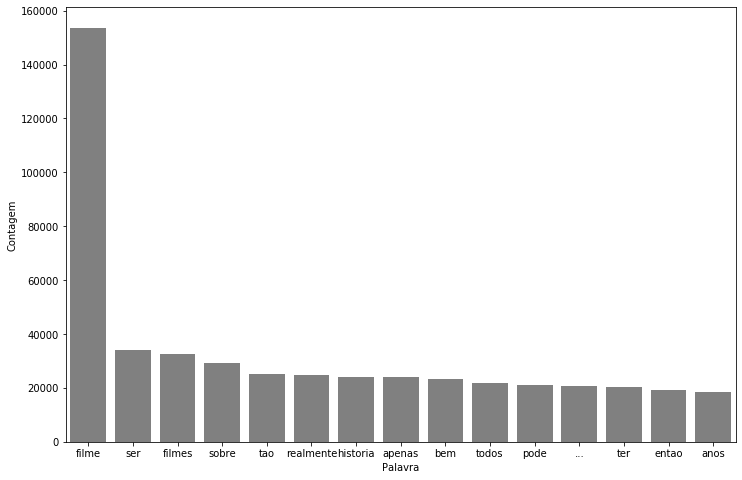

In [0]:
pareto(resenha,"tratamento_4", 15)

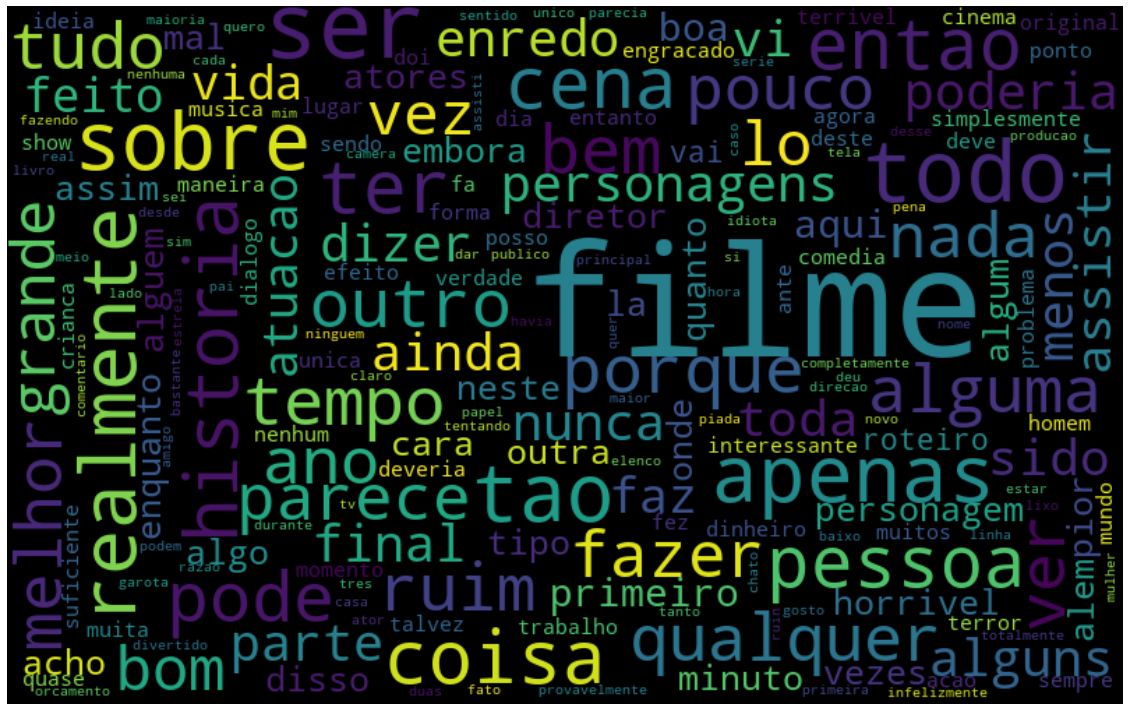

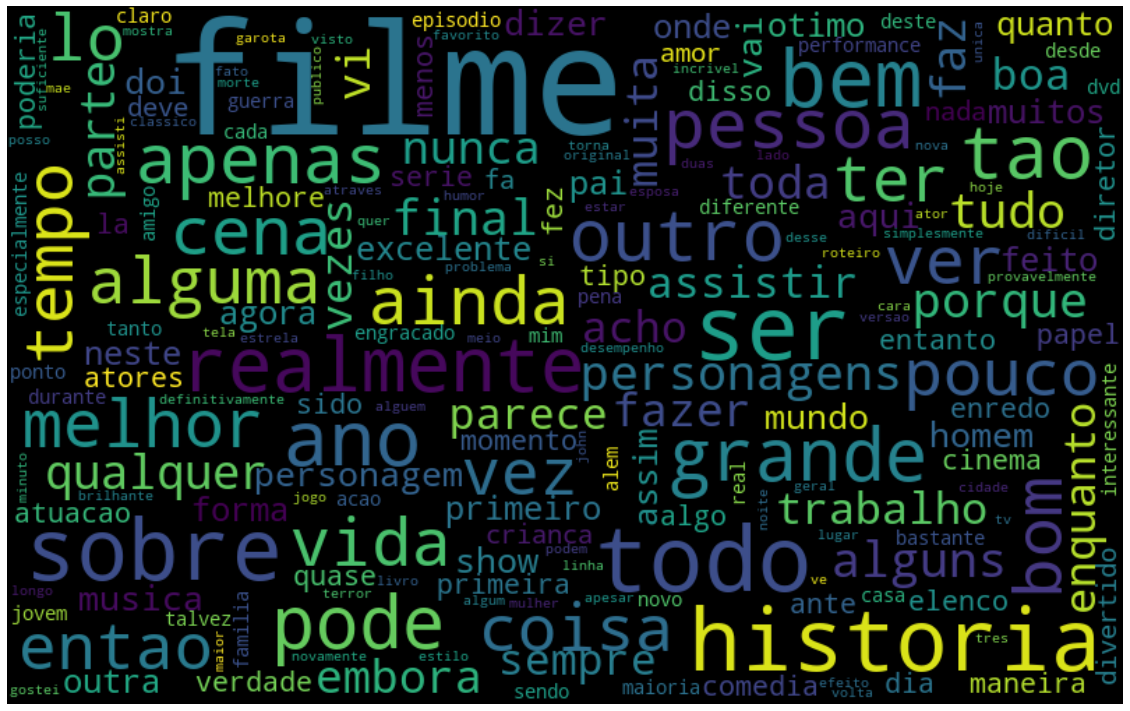

In [0]:
nuvem_palavras_func(resenha,"tratamento_4",False)
nuvem_palavras_func(resenha,"tratamento_4")


In [0]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

In [0]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

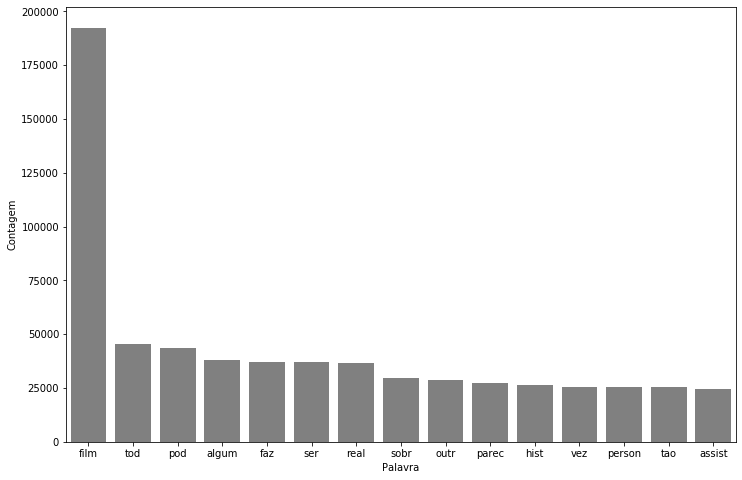

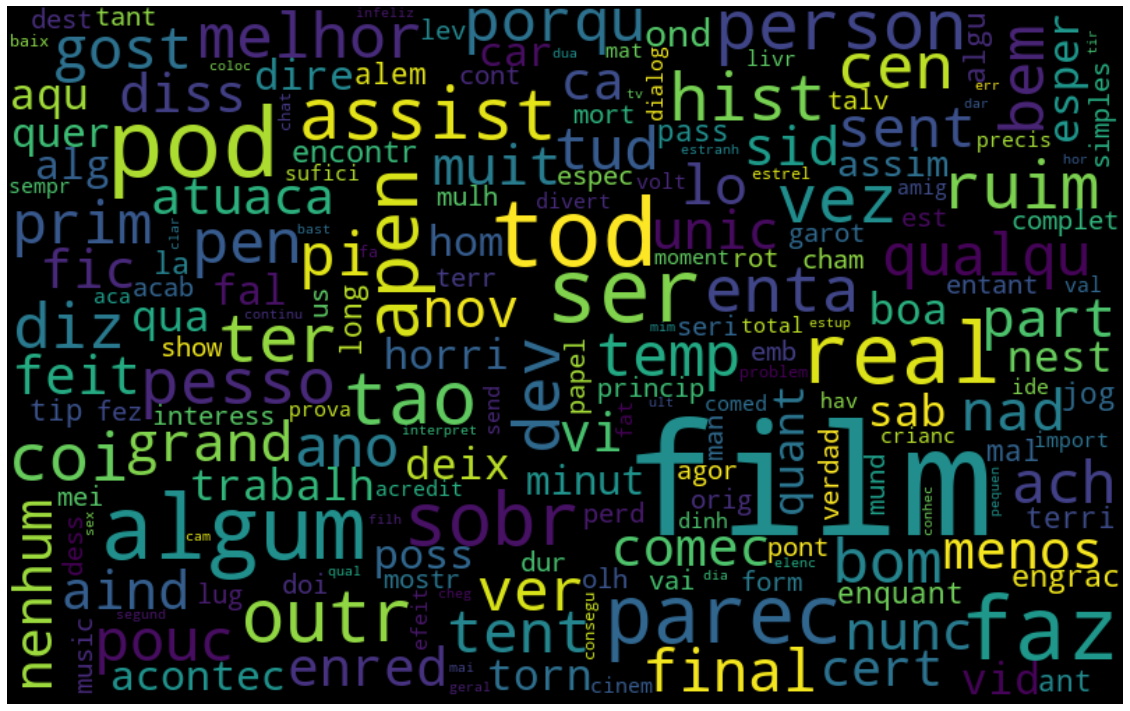

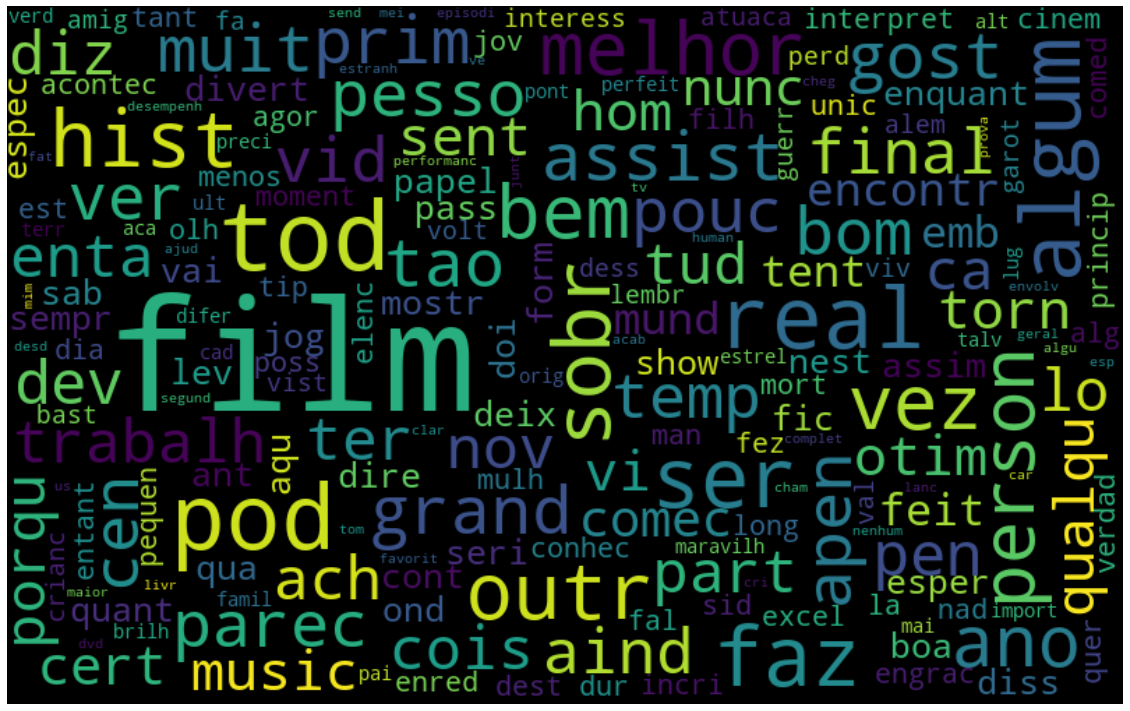

In [0]:
pareto(resenha,"tratamento_5",15)
nuvem_palavras_func(resenha,"tratamento_5",False)
nuvem_palavras_func(resenha,"tratamento_5")

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme bom","Assisti um filme ruim"]
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(caracteristicas.todense(),columns=tfidf.get_feature_names())


Assisti       bom     filme      ruim        um
0  0.448321  0.630099  0.448321  0.000000  0.448321
1  0.448321  0.000000  0.448321  0.630099  0.448321

In [0]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino,teste,classe_treino,classe_teste = train_test_split(tfidf_bruto, resenha['classificacao'], random_state= 42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuraria_tfidf_bruto = regressao_logistica.score(teste, classe_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
acuraria_tfidf_bruto

0.6601698342094622

In [0]:
tfidf_tratado = tfidf.fit_transform(resenha['tratamento_5'])
treino,teste,classe_treino,classe_teste = train_test_split(tfidf_tratado, resenha['classificacao'], random_state= 42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_tratado = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratado

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6987464617873028

In [0]:
from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada,2)
list(pares)


[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [0]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino,teste,classe_treino,classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state= 42)
#regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_ngram = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngram

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8858875859280226

In [0]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino,teste,classe_treino,classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state= 42)
#regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.884270117266478

In [0]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index = tfidf.get_feature_names())
pesos.nlargest(10,0)

0
otim      8.294114
excel     7.978964
perfeit   6.577950
favorit   5.778405
maravilh  5.286375
incri     5.050873
hilari    4.656836
divert    4.582136
ador      4.422483
brilh     4.268905

In [0]:
pesos.nsmallest(10,0)

0
pi      -9.177134
ruim    -9.170209
horri   -8.752838
terri   -7.187796
chat    -6.918661
nad     -6.031082
infeliz -5.308775
decepca -4.999406
ridicul -4.951710
nenhum  -4.920641

STOP WORDS - palavras que devem ser retiradas para análise de linguagem natural

**Agregar as stop words nas palavras, ao invés de removê-las, para melhorar o significado? (criar um atributo para a palavra)

Associar verbo com sujeito e objeto**

Stemização (stemmer) reduzir as palavras flexionadas a um radical comum
O algoritmo do LNTK é o RSLP (removedor de sufixos da lingua portuguesa). Não reduz para a palavra raiz, mas apenas o radical (corredor fica corr, por exemplo)

TF-IDF - dá mais peso pra palavra que está diferente (filme ruim e filme bom - vai dar mais peso para ruim e bom). É um normalizador de frequência de palavras

Ngrams - agrupa as palavras de n em n





